# [Assignment 7] Logistic Regression vs KNN

In this assingment you will work on classification of a glass dataset that is available through Kaggle:

https://www.kaggle.com/datasets/uciml/glass

## Step 0: Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Data

Run the following command will download the **glass.csv** to your colab and then load it to a DataFrame

In [2]:
# !gdown 1IijSItKzryxCz_2PWn6g316KEU7rkIfZ
data=pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Step 2: Defining the problem 

Using this Dataset, we would like to solve a multi class classification problem:

*   **Type** Column is the label 
*   And the rest of columns are features

Therefore, we would like to train a model which takes the features and predict Type!

## Step 3: Data Encoding

Data Encoding is not needed because all columns are numberical as shown in the result of **data.info()**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Step 4: Label Analysis

Run the following command to see the values in the label column. As you can see there are **7 classes numbered from 1 to 7**

*   Looking at the histogram you see that the data is **unbalanced** and different classes have diffenre number of records. 
*   **Class 4 does not have any records**; we dont have any record in data that its type is 4. We double check this by running `data[data['Type']==4]` and getting no records.

In [5]:
data['Type']

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

<AxesSubplot: >

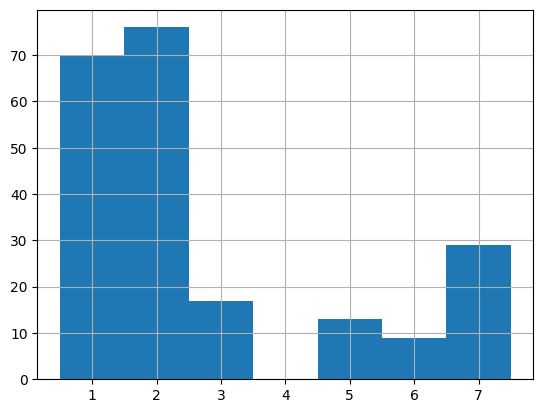

In [6]:
data['Type'].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])

In [7]:
data[data['Type']==4]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


## Step 5: Normalize Data [2 points]

Use  `StandardScaler` from Scikit-learn and normalize all the features **except** the label.

Your normalized features should be save in a DataFrame called `data_n_df` and all column names should be **presearved**.


In [8]:
from sklearn.preprocessing import StandardScaler
### BEGIN SOLUTION

scaler = StandardScaler()
scaler.fit(data.drop(columns='Type'))
data_scaled = scaler.transform(data.drop(columns='Type'))
data_n_df=pd.DataFrame(data=data_scaled)
data_n_df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba',	'Fe']
### END SOLUTION

In [9]:
#if you did the normalization correct, the follwoing command should print True
round(data_n_df['RI'].mean())+round(data_n_df['K'].mean())==0

True

## Step 6: Let's review the correlation among features

Just run the block of code! Dont drop any features even if you see high correlation.

/var/folders/4k/t40pq35106x74tksg9mtcwj00000gn/T/ipykernel_7750/2739963929.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot: >

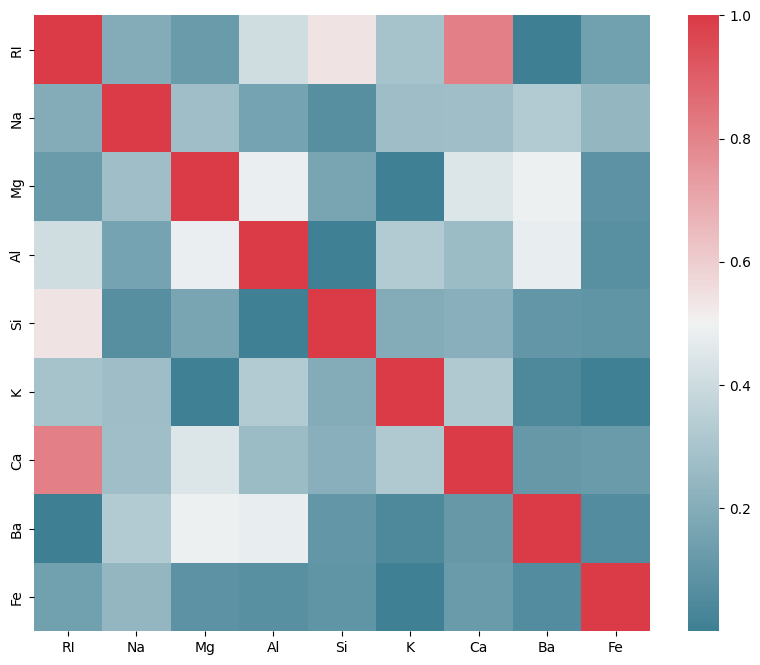

In [10]:
import seaborn as sns
corr=abs(data_n_df.corr())


f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Step 7: Data Split [2 points]

Use  `train_test_split` from Scikit-learn and split the Features and Label(Y) to **70%** training subset and **30%** test subset. Use the variable names as shown below. 

<font color=red>You **must** use `random_state=10` to get the result needed.</font>

In [11]:
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION



X_train, X_test, Y_train, Y_test = train_test_split(data_n_df, data['Type'], random_state=10, train_size=0.7)

### END SOLUTION

<AxesSubplot: >

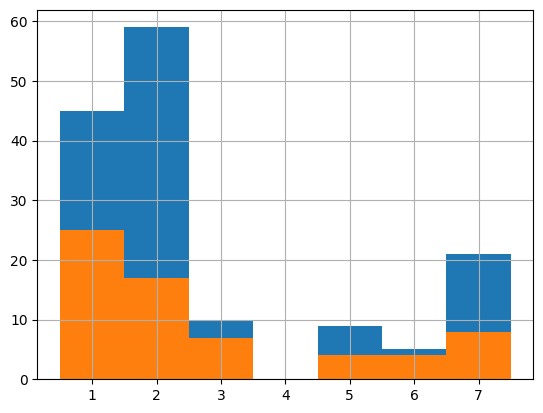

In [12]:
#Review the following histograms and see how data is split.
Y_train.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])
Y_test.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])

## Step 8: KNN [4 points]

Train KNN for K=2,3,4,5

*   Store the accuracy of the 4 models in a list named `accuracy_list`  
*   Store the f1-score of the 4 models in a list named `f1_score_list`

When your code finishes, Each list should have 4 numbers in this order: the first number for the 2NN Model, the second number is for the 3NN Model,...

In [13]:
from numpy import average
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
### BEGIN SOLUTION

accuracy_list = []
f1_score_list = []

for k in range(2,6):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X_train, Y_train)
    Y_test_predicted_KNN = modelKNN.predict(X_test)
    accuracy_list.append(accuracy_score(Y_test, Y_test_predicted_KNN))
    f1_score_list.append(f1_score(Y_test, Y_test_predicted_KNN, average='weighted'))

print (accuracy_list, f1_score_list)
### END SOLUTION

[0.5384615384615384, 0.5076923076923077, 0.5384615384615384, 0.5230769230769231] [0.4957185864068455, 0.48461538461538456, 0.5156885667523966, 0.50416884702599]


Based on the plot, we can decide what to use for K in KNeighborsClassifier.

Text(0.5, 1.0, 'Evaluation metrics vs. K')

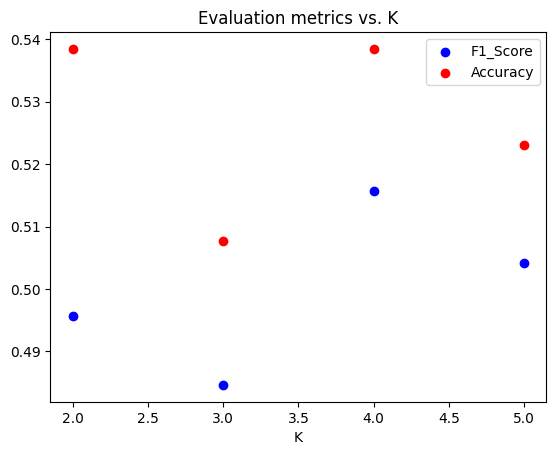

In [14]:
#If you wrote the code correctly, running the following code, should create a plot of accuracy and f1-score of different models compared agains each other.
import matplotlib.pyplot as plt
plt.scatter(range(2,6),f1_score_list,label='F1_Score',color='blue')
plt.scatter(range(2,6),accuracy_list,label='Accuracy',color='red')
plt.xlabel('K')
plt.legend()
plt.title('Evaluation metrics vs. K')

##Step 9: KNN- Best [1 point]

Useing the graph in the previous step, decide on the best K and train the model using the selected K and store test data predictions in a variable named `Y_testing_predicted` 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
### BEGIN SOLUTION



model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, Y_train)
Y_testing_predicted=model.predict(X_test)
### END SOLUTION

/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


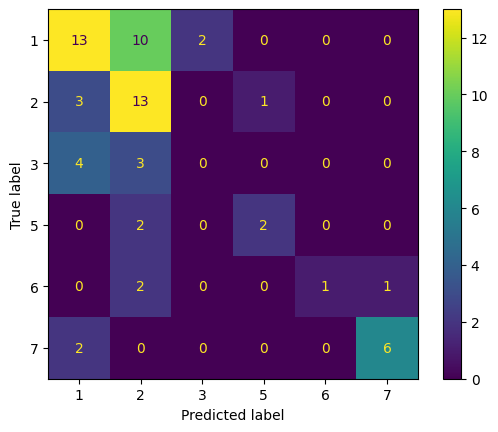

In [25]:
#Run the following commands to get the Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

## Step 9: Logistic Regression - Grid Search [3 points]

Train Logistic Regression for all the combination of param_cases given below using GridSearchCV

In [17]:
param_cases={
    'class_weight':['balanced'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [25, 50]
}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
### BEGIN SOLUTION




Model_G = LogisticRegression()
Model_Grid = GridSearchCV(Model_G, param_grid=param_cases, verbose=2, n_jobs=-1)
Model_Best = Model_Grid.fit(X_train, Y_train)

### END SOLUTION

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight=balanced, max_iter=25, solver=newton-cg; total time=   0.0s
[CV] END ...class_weight=balanced, max_iter=25, solver=lbfgs; total time=   0.0s
[CV] END ...class_weight=balanced, max_iter=25, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=liblinear; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=25, solver=sag; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=25, solver=sag; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=25, solver=sag; total time=   0.0s
[CV] END .....class_weight=balanced, max_i

/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV] END ...class_weight=balanced, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END ...class_weight=balanced, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END ...class_weight=balanced, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END ...class_weight=balanced, max_iter=50, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=50, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=25, solver=newton-cg; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, solver=sag; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, solver=sag; total time=   0.0s
[CV] END .....class_we

/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [19]:
#Running this command should give you the model parameters which resulted in the best accuracy_score
Model_Best.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=25, solver='liblinear')

In [20]:
#Running this command should give you a nice tablecomparing all models.

pd.concat([pd.DataFrame(Model_Best.cv_results_["params"]),pd.DataFrame(Model_Best.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)


,class_weight,max_iter,solver,Accuracy
0,balanced,25,newton-cg,0.591264
1,balanced,25,lbfgs,0.591264
2,balanced,25,liblinear,0.611034
3,balanced,25,sag,0.577471
4,balanced,25,saga,0.570805
5,balanced,50,newton-cg,0.591264
6,balanced,50,lbfgs,0.591264
7,balanced,50,liblinear,0.611034
8,balanced,50,sag,0.591264
9,balanced,50,saga,0.577471


## Step 10: Logistic Regression - Best

Running the following command should give you a confusion matrix of the best logistic regression model!

/Users/jbchang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


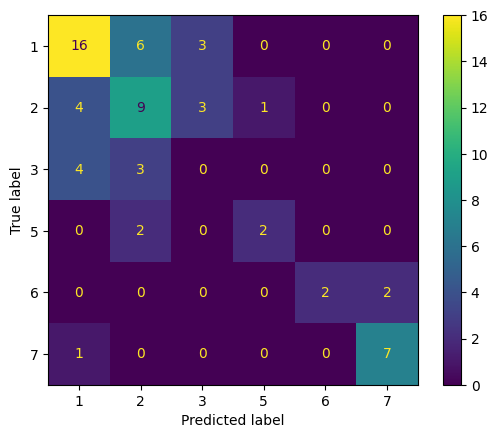

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Model_Best.best_estimator_,X_test,Y_test)